Total number of label files: 20334
Total number of lines in all files: 20334
Counter({5: 2765, 4: 2618, 6: 2352, 3: 2097, 7: 1958, 8: 1494, 2: 1380, 9: 1241, 10: 988, 11: 849, 1: 703, 12: 628, 13: 456, 14: 300, 15: 225, 16: 149, 17: 60, 18: 37, 19: 18, 20: 6, 21: 5, 22: 2, 23: 2, 25: 1})


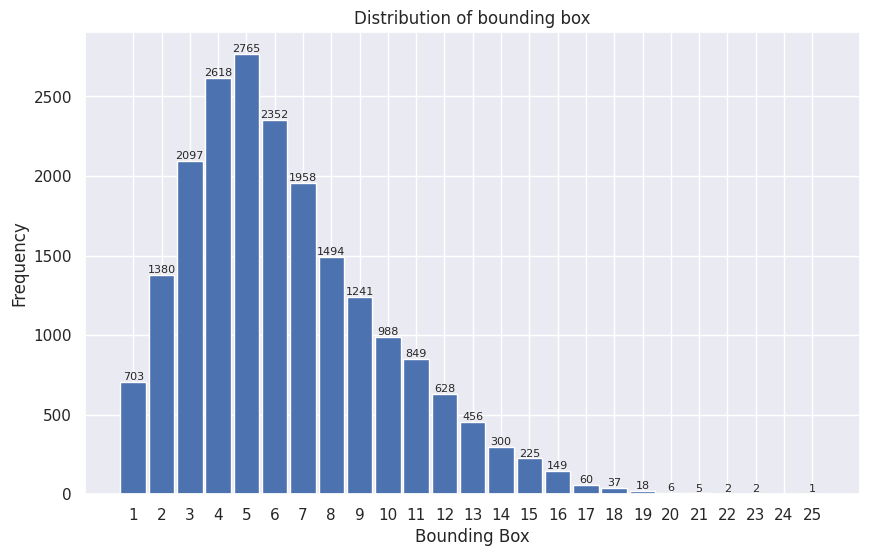

In [6]:
# Import libraries
import os
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Set style
sns.set_theme()
plt.figure(figsize=(10, 6))
plt.title("Distribution of bounding box")

# Set the path
path = '../datasets/bdss20k'
train_path = os.path.join(path, 'labels/train')
val_path = os.path.join(path, 'labels/val')
test_path = os.path.join(path, 'labels/test')


labels = []  # Initialize an empty list to store file paths
labels.extend([os.path.join(train_path, label) for label in os.listdir(train_path)])
labels.extend([os.path.join(val_path, label) for label in os.listdir(val_path)])
labels.extend([os.path.join(test_path, label) for label in os.listdir(test_path)])
print(f"Total number of label files: {len(labels)}")

# Get the number of bounding box in each image
ls = []
for file_path in labels:
    try:
        with open(file_path) as file:
            lines_count = sum(1 for line in file)
            ls.append(lines_count)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        continue

print(f"Total number of lines in all files: {len(ls)}")

# Count the frequency of each number of bounding box
x = Counter(ls)
print(x)

# Plot the distribution
bars = plt.bar(list(x.keys()), list(x.values()), width = 0.9, color='b')  # Convert keys to a list
plt.xticks(range(1, max(x.keys()) + 1))  # Set the xticks to go from 1 to the highest number of bounding box

# Annotate bars with their values
for bar, value in zip(bars, x.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),
             ha='center', va='bottom', fontsize=8)

plt.xlabel('Bounding Box')
plt.ylabel('Frequency')
plt.show()